# Purpose of this notebook  
Create new features from existing ones using statistical analysis then compared it with random forest feature selection to see how the new feature is getting ranked.<br>
Then we used our features (though they were ranked lowest) to create our model. I've used linear regression with r2 score to determine the outcome .<br>

Creating new feature - How much effective is it ? What are the risks involved ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [3]:
df=pd.read_csv('../input/life-expectancy-who/Life Expectancy Data.csv')

In [4]:
df.head(5) 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Renaming columns as few contains white spaces which makes column names longer & it gets splitted into a 
newline making it difficult to read

In [6]:
df.rename(columns={'Life expectancy ':'Life_Expectancy','Adult Mortality':'Adult_Mortality','infant deaths':'Infant_Deaths',
                   'Hepatitis B':'Hepatitis_B','percentage expenditure':'Percentage_Expenditure','Measles ':'Measles',
                   ' BMI ':'BMI','under-five deaths ':'Under-Five_Deaths','Total expenditure':'Total_Expenditure',
                  'Diphtheria ':'Diphtheria',' HIV/AIDS':'HIV_AIDS',' thinness  1-19 years':'Thinness_1-19_Years',
                  ' thinness 5-9 years':'Thinness_5-9_Years','Income composition of resources':'ICR'},inplace=True)
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under-Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1-19_Years',
       'Thinness_5-9_Years', 'ICR', 'Schooling'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   int64  
 2   Status                  2938 non-null   object 
 3   Life_Expectancy         2928 non-null   float64
 4   Adult_Mortality         2928 non-null   float64
 5   Infant_Deaths           2938 non-null   int64  
 6   Alcohol                 2744 non-null   float64
 7   Percentage_Expenditure  2938 non-null   float64
 8   Hepatitis_B             2385 non-null   float64
 9   Measles                 2938 non-null   int64  
 10  BMI                     2904 non-null   float64
 11  Under-Five_Deaths       2938 non-null   int64  
 12  Polio                   2919 non-null   float64
 13  Total_Expenditure       2712 non-null   float64
 14  Diphtheria              2919 non-null   

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'missing_value %': percent_missing})
missing_value_df.sort_values('missing_value %',ascending=False, inplace=True)
missing_value_df

,missing_value %
Population,22.191967
Hepatitis_B,18.822328
GDP,15.248468
Total_Expenditure,7.692308
Alcohol,6.603131
ICR,5.684139
Schooling,5.547992
Thinness_5-9_Years,1.157250
Thinness_1-19_Years,1.157250
BMI,1.157250


In [9]:
percent_missing = (df == 0).astype(int).sum(axis=0) * 100 / len(df)
zero_value_df = pd.DataFrame({'Zero_value %': percent_missing})
zero_value_df.sort_values('Zero_value %',ascending=False, inplace=True)
zero_value_df

,Zero_value %
Measles,33.458135
Infant_Deaths,28.863172
Under-Five_Deaths,26.718856
Percentage_Expenditure,20.796460
ICR,4.424779
Schooling,0.953029
Alcohol,0.000000
Adult_Mortality,0.000000
Hepatitis_B,0.000000
Life_Expectancy,0.000000


<AxesSubplot:>

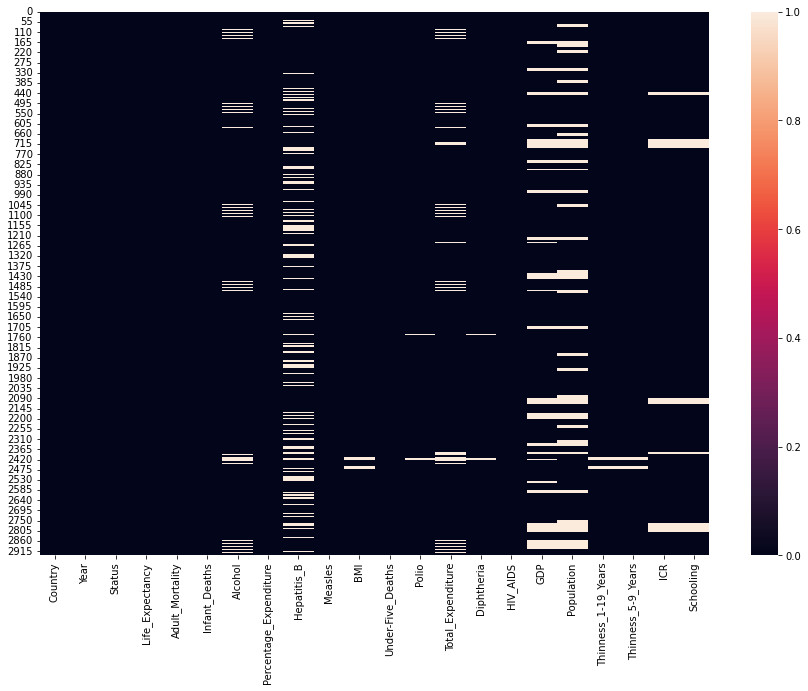

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

before applying correlation we need to check skewness and kurtosis of data<br>


skewness == 0 : normally distributed , can use pearson correation (assuming homogeneity exist)<br>
skewness > 0 : more weight in the left tail of the distribution<br>
skewness < 0 : more weight in the right tail of the distribution<br>

if skewness != 0 we use 
1. kendall : Tau correlation coefficient
2. spearman : Rank correlation

Skewness differentiates extreme values in one versus the other tail <br>
Kurtosis measures extreme values in either tail. <br>

Large kurtsis (+ve/-ve) : five or more standard deviations from the mean , tail data exceeds normal distribution <br>
Low kurtosis : skinny , less extreme than tails of normal distribution


In [11]:
stats = df.describe()
stats.loc['median'] = df.median().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats_df=pd.DataFrame(stats).reindex(['count','mean','std','median','50%','skew','kurt','min','max','25%','75%'])
stats_df 

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under-Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1-19_Years,Thinness_5-9_Years,ICR,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.000000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.498320,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
median,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
skew,-0.006409,-0.638605,1.174369,9.786963,0.589563,4.652051,-1.930845,9.441332,-0.219312,9.495065,-2.098053,0.618686,-2.072753,5.396112,3.206655,1.591624e+01,1.711471,1.777424,-1.143763,-0.602437
kurt,-1.213722,-0.234477,1.748860,116.042756,-0.802909,26.573387,2.770259,114.859903,-1.291095,109.752795,3.776510,1.156270,3.558143,34.892008,12.333074,2.980103e+02,3.970439,4.358730,1.392814,0.886151
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000


**How close Mean & Std is to each other? -** What transformation we need to perform <br>
**How much of it lack symmetry ? - skew** <br>
    symmetric - mean = median = mode = 0     ====> (-0.5,+0.5) <br>
    +ve/right skewed - mean > median > mode  ====> (+0.5,+1)   <br>
    -ve/left skewed - mode > median > mean   ====> (-1,-0.5)   <br>
**Heavy tailed or light tailed ? - kurt** <br>
    kurt > 0 - numbers located in tails , high probability of extreme events <br>
    kurt < 0 - numbers located in high proximity to mean,low probability of extreme events <br>
    -1 > kurt > +1 - sizable departure from normality<br>
    
When data skewed, the tail region may behave as an outlier for the statistical model, and outliers unsympathetically affect the model’s performance especially regression-based models. Some statistical models are hardy to outliers like Tree-based models, but it will limit the possibility to try other models. So there is a necessity to transform the skewed data to close enough to a Normal distribution.

<AxesSubplot:>

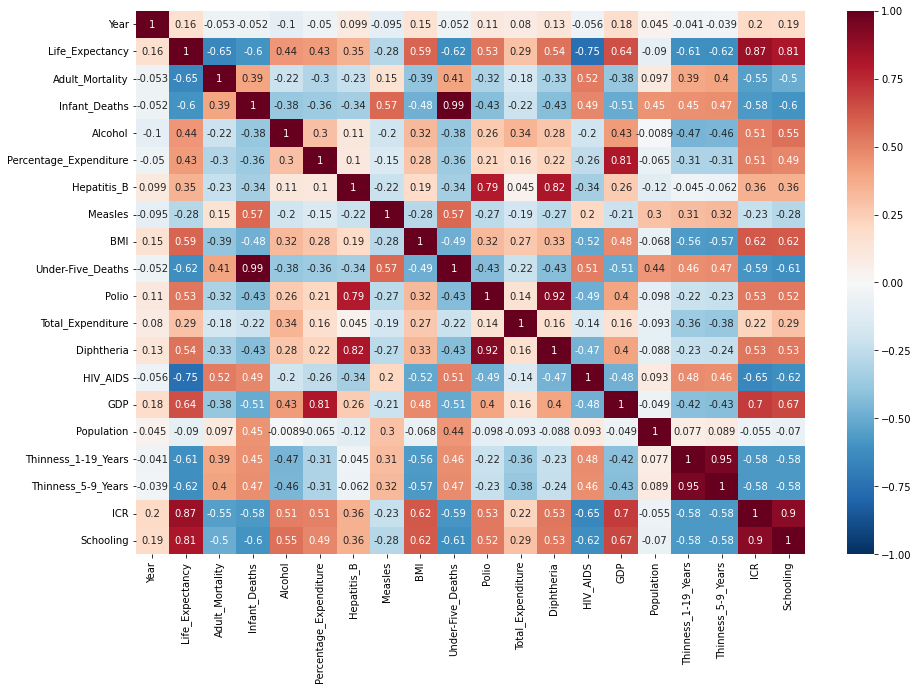

In [12]:
corr=df.corr(method='spearman',min_periods=10)
plt.figure(figsize=(15,10))
sns.heatmap(data=corr,cmap="RdBu_r",annot=True,vmin=-1,vmax=1)

<AxesSubplot:>

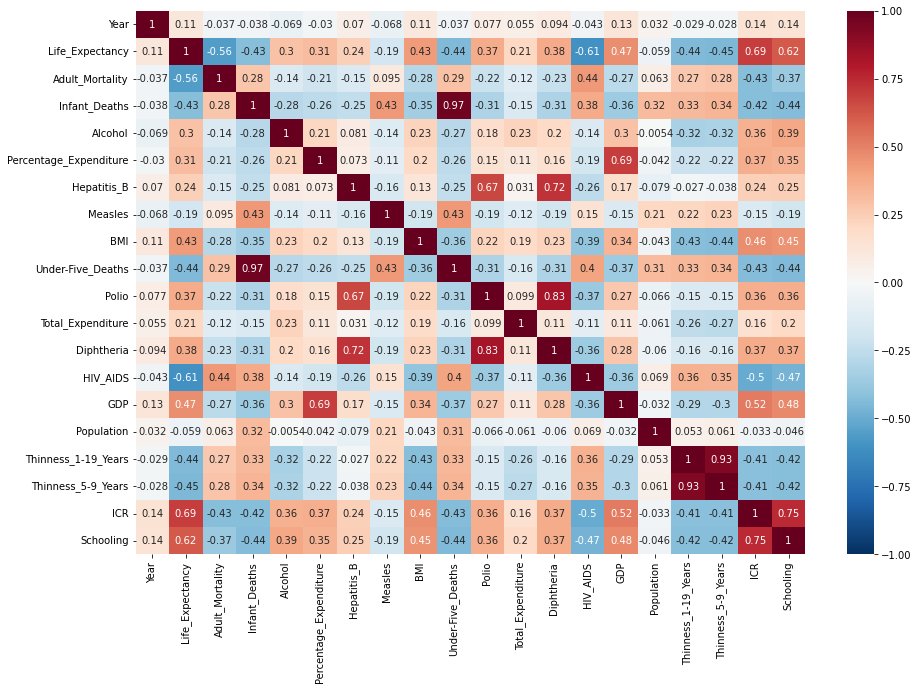

In [13]:
corr=df.corr(method='kendall')
plt.figure(figsize=(15,10))
sns.heatmap(data=corr,cmap="RdBu_r",annot=True,vmin=-1,vmax=1)

**+ve correlation (> 50%) -** <br>
[(Infant_Deaths,Under-Five_Deaths),<br>
(GDP,Percentage_Expenditure),<br>
(Diphtheria,Polio - Hepatitis_B),<br>
(ICR,Schooling - Alcohol,BMI),<br>
(Thinness_1-19_Years,Thinness_5-9_Years)]<br>
**-ve correlation (< 50%) -** <br>
[(ICR,Schooling-GDP,BMI,Infant_Deaths,HIV_AIDS,Under-Five_Deaths),<br>
(Thinness_1-19_Years,Thinness_5-9_Years - ICR,Schooling,Alcohol,BMI),<br>
(Polio,Diphtheria,GDP -HIV_AIDS)]<br>
**correlation with Life_Expectancy** - <br>
[Schooling,ICR (+ve = greater than 50%)] , <br>
[HIV_AIDS,Adult_Mortality(-ve = lesser than 50%)] <br>
[GDP,Diphtheria,Polio,BMI(+ve = 0-50%)] <br>
[Thinness_1-19_Years,Thinness_5-9_Years,Under-Five_Deaths,Infant_Deaths (-ve = 0-50% )]

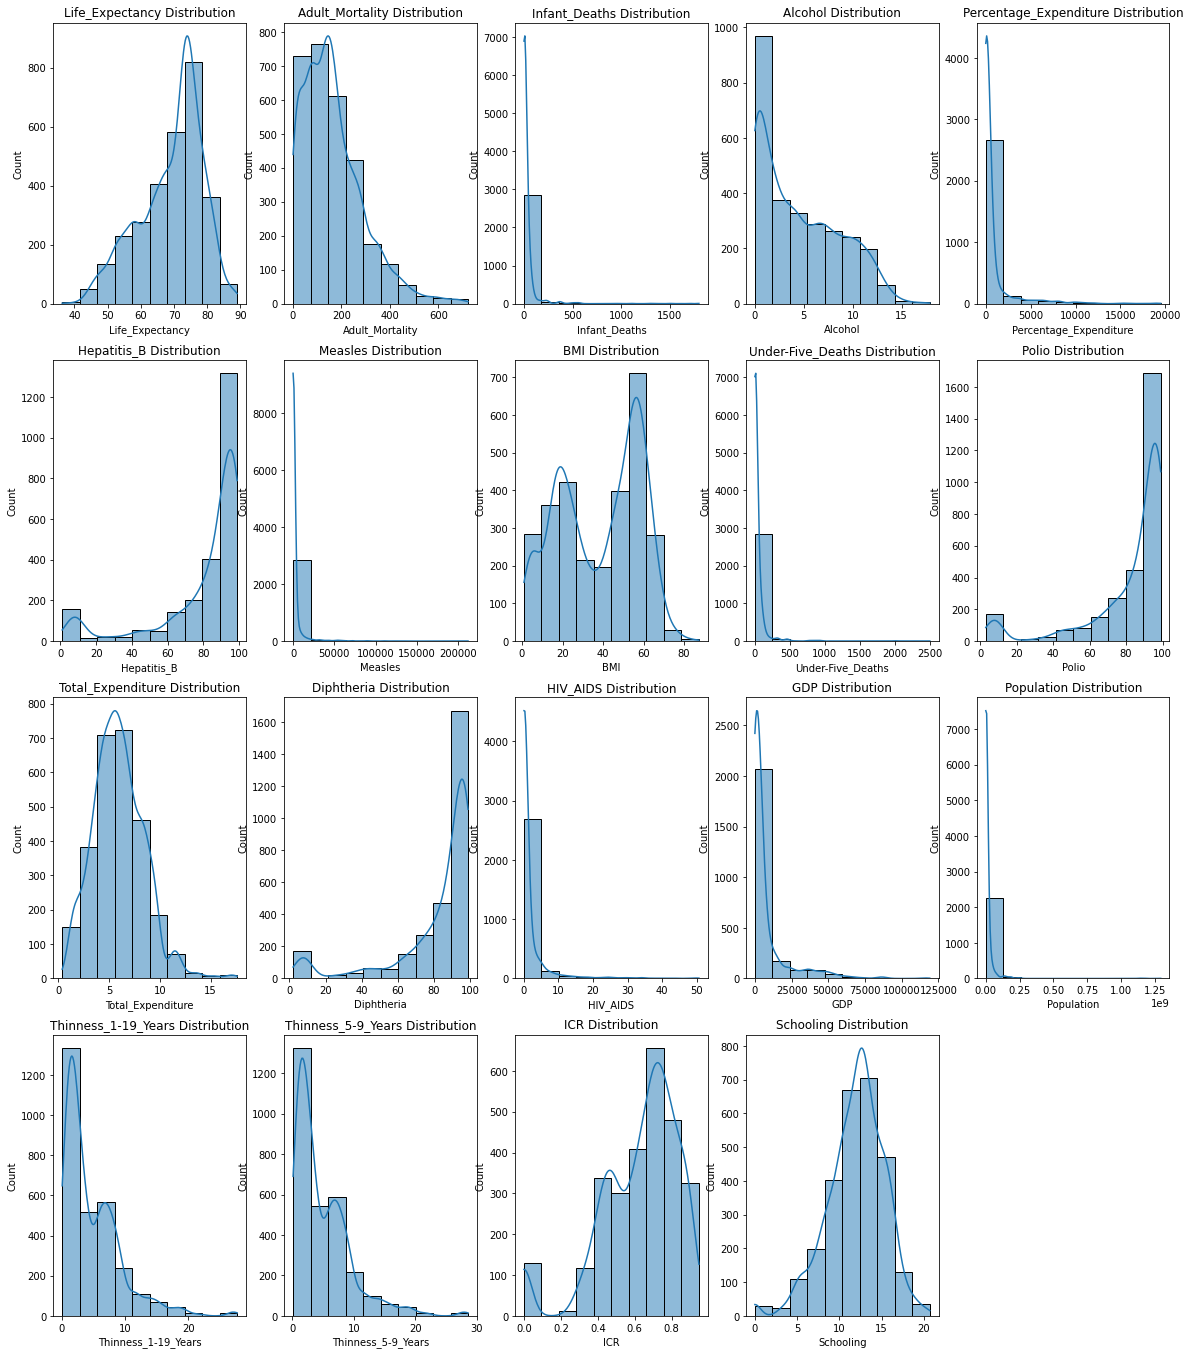

In [14]:
col=['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 
     'Hepatitis_B','Measles', 'BMI', 'Under-Five_Deaths', 'Polio', 'Total_Expenditure','Diphtheria', 
     'HIV_AIDS', 'GDP', 'Population', 'Thinness_1-19_Years','Thinness_5-9_Years', 'ICR', 'Schooling']

dic={}
#column index mapping for subplot
for i in range(len(col)):
    dic[col[i]]=i+1
# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for key,val in dic.items():
    plt.subplot(5,5,val)
    sns.histplot(x=df[key],data=df,bins=10,kde=True)
    plt.xlabel(key)
    plt.title(key+' Distribution')

plt.show()

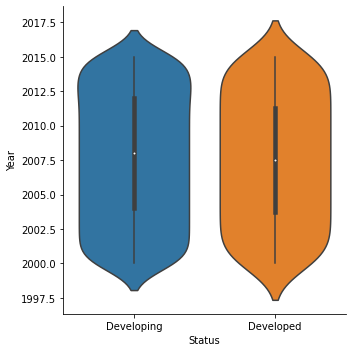

<Figure size 4320x2880 with 0 Axes>

In [15]:
sns.catplot(x='Status',y='Year',kind='violin',data=df)
plt.figure(figsize=(60,40))
plt.show()

In [16]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# df['Country']= label_encoder.fit_transform(df['Country']) 
# df['Status']= label_encoder.fit_transform(df['Status']) 

In [17]:
from sklearn.impute import KNNImputer 
#uses nearest neighbour concept

In [18]:
imputer=KNNImputer(n_neighbors=10)
#we're using fit_transform so we need a new dataframe to avoid overwrite
df_new=df[df.select_dtypes(include=['int64','float64']).columns]
df_KNN=pd.DataFrame(imputer.fit_transform(df_new))

In [19]:
df_KNN.columns=['Year', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under-Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1-19_Years',
       'Thinness_5-9_Years', 'ICR', 'Schooling']
df_KNN_std_=df_KNN[['Total_Expenditure', 'Population', 'ICR','BMI','Schooling',
                  'Life_Expectancy', 'Adult_Mortality', 'Alcohol', 'Hepatitis_B',
                    'Polio','Diphtheria', 'GDP', 'Thinness_1-19_Years',
                   'Thinness_5-9_Years']].std()
df_KNN_std_

Total_Expenditure      2.427631e+00
Population             5.474976e+07
ICR                    2.080986e-01
BMI                    1.995477e+01
Schooling              3.325084e+00
Life_Expectancy        9.511776e+00
Adult_Mortality        1.241152e+02
Alcohol                3.960926e+00
Hepatitis_B            2.322426e+01
Polio                  2.336611e+01
Diphtheria             2.365520e+01
GDP                    1.331701e+04
Thinness_1-19_Years    4.402489e+00
Thinness_5-9_Years     4.490279e+00
dtype: float64

1. central tendency based imputation (+ randomness)
2. random sample imputation 
3. median value imputation

Population 	    -       22.191967<br>
Hepatitis_B 	  -     18.822328<br>
GDP 	         -      15.248468<br>
Total_Expenditure 	-   7.692308<br>
Alcohol 	   -        6.603131<br>
ICR 	    -           5.684139<br>
Schooling 	   -        5.547992<br>
Thinness_5-9_Years 	-   1.157250<br>
Thinness_1-19_Years -   1.157250<br>
BMI 	         -      1.157250<br>
Polio 	       -        0.646698<br>
Diphtheria 	   -        0.646698<br>
Life_Expectancy 	-   0.340368<br>
Adult_Mortality 	-   0.340368<br>

In [20]:
def central_tendency_imputer(data):
    for col in data.columns.values:
        mean_=data[col].mean()
        median_=data[col].median()
        std_=data[col].std()
        is_null_=data[col].isnull().sum()
        rand_=np.random.choice([mean_- std_,mean_ + std_,is_null_])
        data[col]=data[col].fillna(rand_)
    return data

In [21]:
def random_sample_imputer(data):
    for col in data.columns.values:
        median_=data[col].median()
        rand_s = data[col].dropna().sample(data[col].isnull().sum(),random_state=0)
        rand_s.index=data[data[col].isnull()].index
        data[col]=data[col].fillna(rand_s)
    return data

In [22]:
data_ct=df[['Total_Expenditure', 'Population', 'ICR','BMI','Schooling']]
df_CT=central_tendency_imputer(data_ct)
#df_CT=df_CT.drop(['Total_Expenditure', 'Population', 'ICR','BMI','Schooling'],axis=1)
df_CT_std_=df_CT.std()
df_CT_std_

Total_Expenditure    2.490915e+00
Population           5.407583e+07
ICR                  3.852886e+01
BMI                  2.004269e+01
Schooling            3.472741e+01
dtype: float64

In [23]:
data_rs=df[['Life_Expectancy', 'Adult_Mortality', 'Alcohol', 'Hepatitis_B',
        'Polio','Diphtheria', 'GDP', 'Thinness_1-19_Years',
       'Thinness_5-9_Years' ]]
df_RS=random_sample_imputer(data_rs)
df_RS_std_=df_RS.std()
df_RS_std_

Life_Expectancy            9.521443
Adult_Mortality          124.324827
Alcohol                    4.046275
Hepatitis_B               25.069198
Polio                     23.464716
Diphtheria                23.667401
GDP                    14189.379734
Thinness_1-19_Years        4.419409
Thinness_5-9_Years         4.507815
dtype: float64

In [24]:
df_std_=df[['Total_Expenditure', 'Population', 'ICR','BMI','Schooling',
                  'Life_Expectancy', 'Adult_Mortality', 'Alcohol', 'Hepatitis_B',
                    'Polio','Diphtheria', 'GDP', 'Thinness_1-19_Years',
                   'Thinness_5-9_Years']].std()
df_mean_=df[['Total_Expenditure', 'Population', 'ICR','BMI','Schooling',
                  'Life_Expectancy', 'Adult_Mortality', 'Alcohol', 'Hepatitis_B',
                    'Polio','Diphtheria', 'GDP', 'Thinness_1-19_Years',
                   'Thinness_5-9_Years']].mean()


In [25]:
df_med_=df[['Total_Expenditure','Population','ICR','BMI','Schooling',
                  'Life_Expectancy', 'Adult_Mortality', 'Alcohol', 'Hepatitis_B',
                    'Polio','Diphtheria', 'GDP', 'Thinness_1-19_Years',
                   'Thinness_5-9_Years']]

for col in df_med_:
    median_=df_med_[col].median()
    df_med_[col]=df_med_[col].fillna(median_)

df_med_std_=df_med_.std()
df_med_.isnull().sum()

Total_Expenditure      0
Population             0
ICR                    0
BMI                    0
Schooling              0
Life_Expectancy        0
Adult_Mortality        0
Alcohol                0
Hepatitis_B            0
Polio                  0
Diphtheria             0
GDP                    0
Thinness_1-19_Years    0
Thinness_5-9_Years     0
dtype: int64

In [26]:
df_manual_std_=pd.concat([df_CT_std_,df_RS_std_],axis=0)
df_std_comp=pd.concat([df_mean_,df_std_,df_KNN_std_,df_manual_std_,df_med_std_],axis=1)
df_std_comp.columns=['Mean','STD','KNN','Manual','Median']
df_std_comp

,Mean,STD,KNN,Manual,Median
Total_Expenditure,5.938190e+00,2.498320e+00,2.427631e+00,2.490915e+00,2.400770e+00
Population,1.275338e+07,6.101210e+07,5.474976e+07,5.407583e+07,5.402242e+07
ICR,6.275511e-01,2.109036e-01,2.080986e-01,3.852886e+01,2.051396e-01
BMI,3.832125e+01,2.004403e+01,1.995477e+01,2.004269e+01,1.993537e+01
Schooling,1.199279e+01,3.358920e+00,3.325084e+00,3.472741e+01,3.265139e+00
Life_Expectancy,6.922493e+01,9.523867e+00,9.511776e+00,9.521443e+00,9.509115e+00
Adult_Mortality,1.647964e+02,1.242921e+02,1.241152e+02,1.243248e+02,1.240862e+02
Alcohol,4.602861e+00,4.052413e+00,3.960926e+00,4.046275e+00,3.921946e+00
Hepatitis_B,8.094046e+01,2.507002e+01,2.322426e+01,2.506920e+01,2.299698e+01
Polio,8.255019e+01,2.342805e+01,2.336611e+01,2.346472e+01,2.336717e+01


Replacing null value with Median is giving the bwst result , followed by KNN Imputer . It tells us there are outliers & values are clustered around Median <br>

High/Low std = Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out<br>

Relation between mean vs std tells us about the outliers too. i.e distribution of data points from max & min<br>

In [27]:
# Replacing nan values with median of that feature , as it's the best method so far
median=df.median()
df=df.fillna(median)
df.isnull().sum()

Country                   0
Year                      0
Status                    0
Life_Expectancy           0
Adult_Mortality           0
Infant_Deaths             0
Alcohol                   0
Percentage_Expenditure    0
Hepatitis_B               0
Measles                   0
BMI                       0
Under-Five_Deaths         0
Polio                     0
Total_Expenditure         0
Diphtheria                0
HIV_AIDS                  0
GDP                       0
Population                0
Thinness_1-19_Years       0
Thinness_5-9_Years        0
ICR                       0
Schooling                 0
dtype: int64

Before removing outliers , let's check distributions of other features too 

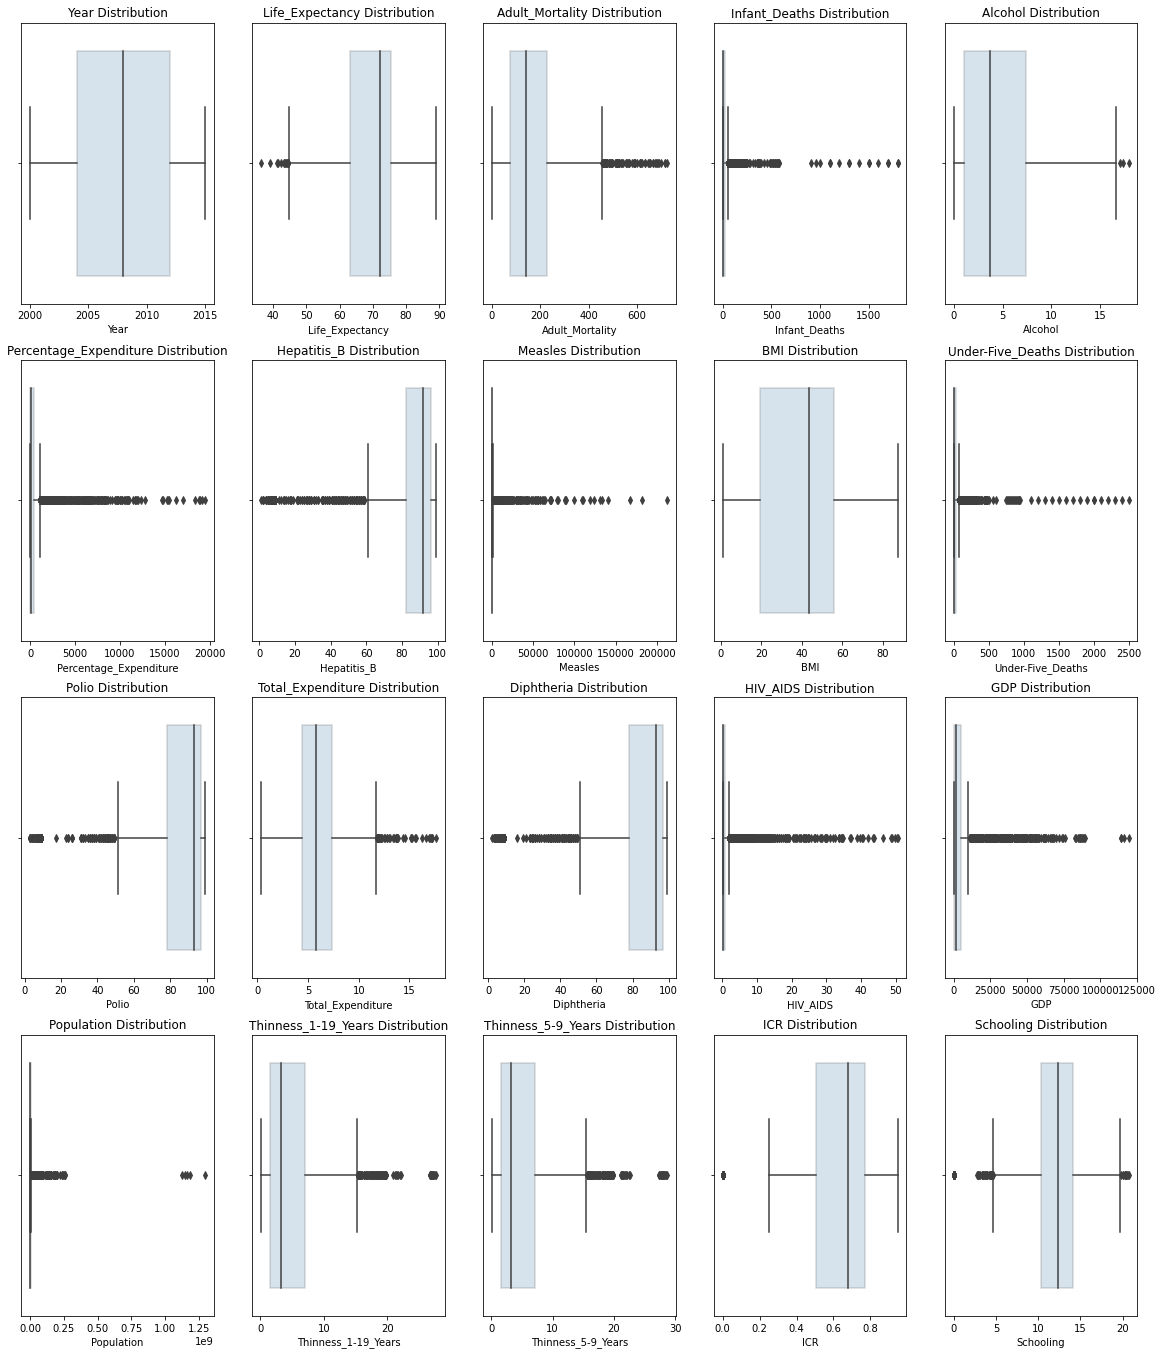

In [28]:
col=['Year','Life_Expectancy', 'Adult_Mortality','Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 
     'Hepatitis_B','Measles', 'BMI', 'Under-Five_Deaths', 'Polio', 'Total_Expenditure',
     'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1-19_Years','Thinness_5-9_Years', 
     'ICR', 'Schooling']
dic={}
#map an integer to each column value, which will be used in subplot selection
for i in range(len(col)):
    dic[col[i]]=i+1

    
plt.figure(figsize=(20,30))

for key,val in dic.items():
    plt.subplot(5,5,val)
    sns.boxplot(x=df[key],data=df,boxprops=dict(alpha=0.2))
    plt.xlabel(key)
    plt.title(key+' Distribution')

plt.show()

Feature Transformation :
Infant death,Adult mortality ,Measles -> find % of total population affected per country per year
we can use standardization to scale thing down<br>

compare mortality rate for Hepatitis_B,Measles,Diphtheria,HIV_AIDS using ANOVA <br>

We have less number of records so we just can't drop the outliers , we have to impute them to an acceptable range <br>


As we have seen in previous histogram + kde plot except(Schooling & Total_Expenditure) none of them follow Normal distribution so we're trying these transformation to make them as close as Normal Distribution - Thanks to [Krish Naik Feature Engineering](https://github.com/krishnaik06/Feature-Engineering-Live-sessions/blob/master/Feature%20Engineering-%20Normalization%20And%20Standardization-%20Day%205.ipynb)

1. logarithmic transformation
2. reciprocal transformation
3. square root transformation
4. exponential transformation (more general, you can use any exponent)
5. boxcox transformation (intentionally commented it as it modifies datafram , we've to remove that column later)

As none of them follow normal distribution we can't trust one-way ANOVA test (though it can tolerate data that is non-normal (skewed or kurtotic distributions) with only a small effect on the Type I error rate

In [29]:
# from scipy.stats import f_oneway
# f_oneway(df['Hepatitis_B'],df['Measles'],df['Diphtheria'],df['HIV_AIDS'])
#F_onewayResult(statistic=90.43876694736144, pvalue=7.409267726887965e-58)

# **Now the most interesting part creating new features - How & Why ??** <br>
**Disease_Death** - Disease causing death , it doesn't matter what disease the effect is same for all of them so we can combine them into one feature , upon carefully reading Measles & HIV_AIDS are the 2 disease we're interested on<br>
1. According to data description sample was collected per 100 population , so we scale down to 100<br>
2. Still the value is high , so apply reciprocal transformation (since log is too small for that)<br>

**Mortality_Rate** - We have 3 potential candidate here - Adult_Mortality,Infant_Deaths,Under-Five_Deaths
Here the 1st question->  If infant(0-1) did cover under Under-Five_Deaths category why to put it on 1st place ?? <br>

Ans -> we don't know for sure , may be keeping track of birth-cirtificate is easier than death certificate but how do we deal with it ? <br>

Ans -> Upon looking at barplot we see a striking similarity between Infant_Deaths,Under-Five_Deaths so we can take any one, so for proper distribution = Adult_Mortality+Infant_Deaths-Under-Five_Deaths , then we do a scale down to per 100 population<br>

what if value becomes -ve so we take abs() -> till high do a square root (reduce a large amount ) -> now we need to reduce a small amount carefully (upon checking boxplot) we use log trasformation<br>

**Vaccination_Immunity** - we have Polio,Hepatitis_B,Diphtheria these are disease from mostly developing country where government expenditure is a big factor for eradicationg these viruses <br>

So we calculate how effeciently money is being used to vaccinate - <br> 
Numerator = vaccination rate , Denominator = avg. expenditure = (Gov. + personal) / 2 -> we smoothen the distribution by slightly shifting the tails using log transformation<br>


**+ve correlation (> 50%) -** <br>
[(Infant_Deaths,Under-Five_Deaths),<br>
(GDP,Percentage_Expenditure),<br>
(Diphtheria,Polio - Hepatitis_B),<br>
(ICR,Schooling - Alcohol,BMI),<br>
(Thinness_1-19_Years,Thinness_5-9_Years)]<br>
**-ve correlation (< 50%) -** <br>
[(ICR,Schooling-GDP,BMI,Infant_Deaths,HIV_AIDS,Under-Five_Deaths),<br>
(Thinness_1-19_Years,Thinness_5-9_Years - ICR,Schooling,Alcohol,BMI),<br>
(Polio,Diphtheria,GDP -HIV_AIDS)]<br>
**correlation with Life_Expectancy** - <br>
[Schooling,ICR (+ve = greater than 50%)] , <br>
[HIV_AIDS,Adult_Mortality(-ve = lesser than 50%)] <br>
[GDP,Diphtheria,Polio,BMI(+ve = 0-50%)] <br>
[Thinness_1-19_Years,Thinness_5-9_Years,Under-Five_Deaths,Infant_Deaths (-ve = 0-50% )]<br>

from above list - <br>
1. GDP,Percentage_Expenditure(+ve)- > Percentage_Expenditure taken as representative feature
2. Polio,Diphtheria,GDP - HIV_AIDS(-ve)-> HIV_AIDS has been used as indicator of death & Polio,Diphtheria immunity from death/close to death (vaccination)
3. ICR,Schooling - GDP,BMI,Infant_Deaths,HIV_AIDS,Under-Five_Deaths(-ve) - Schooling is an important factor so how a counytry is providing education to it's people that's important , here other features have been aggregated to new representative feature
4. Thinness_1-19_Years,Thinness_5-9_Years(+ve) - combined to a single representative feature
5. Infant_Deaths & Under-Five_Deaths = Mortality Rate
6. Thinness_1-19_Years,Thinness_5-9_Years - ICR,Schooling,Alcohol,BMI(-ve) - combined Alcohol,BMI to a new feature 'Changed_Life_Expectancy' on which we'll train our model 

In [30]:
df['Disease_Death']=(df['Measles']+df['HIV_AIDS'])/10
df['Disease_Death']=1/df['Disease_Death']
df['Mortality_Rate']=df['Adult_Mortality']+df['Infant_Deaths']-df['Under-Five_Deaths']/10
df['Mortality_Rate']=np.log((df['Mortality_Rate'].abs())**(1/2))
df['Vaccination_Immunity']=np.log(2*(df['Polio']+df['Hepatitis_B']+df['Diphtheria'])/(df['Percentage_Expenditure']+df['Total_Expenditure']))

Schooling is an important factor for knowledge about hygiene & financial independence - Here values are too much skewed so 1st we apply log transformation then calculate Yearly costing for school . By doing so we can estimate a country with low GDP can afford schooling or not<br>

Don't replace 0 as log(1)=0 , so it's another reason to apply log transform 1st to avoid zero division error <br>

In [31]:
#df['Schooling']=df['Schooling'].replace(0,-1)
df['Yearly_Cost_Schooling']=np.log(df['Percentage_Expenditure']+df['Total_Expenditure'])/np.log(df['Schooling'])

Here both feature shows almost same property but distributon is a bit different , if we take difference we loose the variance in a certain range so we scale down (using log transformation) then take avg. to preserve the variance in mostly Under_Weight children range - **Under_weight child has more risk of dying than teenagers**<br>

In [32]:
df['Under_Weight']=(np.log(df['Thinness_1-19_Years'])+np.log(df['Thinness_5-9_Years']))/2

The mortality rates of normal-weight individuals who were formerly overweight or obese were 47.48 and 66.67 per 1000 person-years, respectively. Therefore, people who converted from overweight or obese to normal weight at baseline raised the mortality rate of the normal-weight category to 33.81 per 1000 person-years.

BMI value > 30 = Obesity one primary cause of taking 7g of pure-alcohol daily i.e 2.5 Liter yearly(per 100 person above 15)

In [33]:
df['Changed_Life_Expectancy']=df['Life_Expectancy']
df.loc[(df['BMI']>30) & (df['Alcohol']>2.5),'Changed_Life_Expectancy']=df['Life_Expectancy']*(1-0.34)

In [34]:
df['Changed_Life_Expectancy']=np.log(df['Changed_Life_Expectancy'])

In [35]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [37]:
df_new=df
df_new.drop(['Country','Year','Status'],axis=1,inplace=True)

In [38]:
#converting both of them to integer as float can be large value for Linear Regression
X=df_new.iloc[:,1:].astype('int')
Y=df_new.iloc[:,0].astype('int')

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [40]:
scaler=RobustScaler()
#X_train_scaled=scaler.fit_transform(X_train) 
# let's do fit() & transform() separately for X_train
X_train_fit=scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
# transform X_test
X_test_scaled=scaler.transform(X_test) 
#use orginal variable for convenience
X_train=X_train_scaled
X_test=X_test_scaled

In [41]:
df_tmp=pd.DataFrame(X_train,columns=X.columns)
stats = df_tmp.describe()
stats.loc['median'] = df_tmp.median().tolist()
stats.loc['skew'] = df_tmp.skew().tolist()
stats.loc['kurt'] = df_tmp.kurtosis().tolist()
stats_df=pd.DataFrame(stats).reindex(['count','mean','std','median','50%','skew','kurt','min','max','25%','75%'])
stats_df 

,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under-Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1-19_Years,Thinness_5-9_Years,ICR,Schooling,Disease_Death,Mortality_Rate,Vaccination_Immunity,Yearly_Cost_Schooling,Under_Weight,Changed_Life_Expectancy
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.0,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,0.133189,1.233784,0.181915,1.555332,-0.649787,7.034741,-0.141737,1.242808,-0.550549,0.118582,-0.559059,1.469787,1.151465,2.125378,0.240709,0.242695,0.0,-0.110213,0.944426,-0.062979,0.156738,0.254894,-0.223830,-0.479574
std,0.795992,5.130653,0.644987,4.570125,1.645302,33.312421,0.540924,5.063435,1.234165,0.801251,1.240701,4.849430,3.194450,12.127075,0.737093,0.749462,0.0,0.811320,1.601486,0.522250,0.624061,0.895645,0.874468,0.499689
median,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skew,1.130874,9.500645,0.722039,4.514157,-2.255169,8.931587,-0.222152,9.212631,-2.110302,0.753098,-2.086329,5.797748,3.598255,18.139299,1.690200,1.773027,0.0,-0.541224,1.309077,-0.617288,-0.050365,0.036282,-0.020055,-0.081823
kurt,1.629493,111.121169,-0.552152,24.626580,4.301899,100.701530,-1.294523,104.835364,3.813521,1.751317,3.631061,40.995383,15.890824,414.001229,3.874808,4.323985,0.0,0.873704,-0.171799,2.404932,-0.939343,-0.906509,-0.265351,-1.995004
min,-0.922581,-0.130435,-0.500000,-0.151929,-6.500000,-0.050734,-1.135135,-0.125984,-4.736842,-1.666667,-4.789474,0.000000,-0.426638,-0.353340,-0.500000,-0.500000,0.0,-3.000000,0.000000,-2.000000,-1.333333,-1.000000,-3.000000,-1.000000
max,3.735484,78.130435,2.333333,44.859347,0.500000,566.526035,1.081081,78.614173,0.315789,4.000000,0.315789,50.000000,28.379502,295.767092,4.000000,4.166667,0.0,2.000000,4.000000,1.000000,1.333333,3.000000,2.000000,0.000000
25%,-0.451613,-0.130435,-0.333333,-0.142433,-0.714286,-0.050734,-0.648649,-0.125984,-0.789474,-0.333333,-0.789474,0.000000,-0.286742,-0.237356,-0.333333,-0.333333,0.0,-0.500000,0.000000,0.000000,-0.333333,0.000000,-1.000000,-1.000000


In [42]:
lr = LinearRegression()
lr = lr.fit(X_train,Y_train)

In [43]:
#model evaluation for training set
Y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
print("The model performance for training set")
print(f"Train Error(rmse) : {rmse}")

The model performance for training set
Train Error(rmse) : 3.9144020099545984


In [44]:
#model evaluation for test set
Y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_predict)))
print("The model performance for test set")
print(f"Train Error(rmse) : {rmse}")

The model performance for test set
Train Error(rmse) : 3.8712111834217984


r2 - represents how much variance of the data is explained by the model, the R2=0.90 means that 0.10 of the variance can not explain by the model, the logical case when R^2=1 the model completely fit and explained all variance <br>

Cross-validation - primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data <br>

we can't look at test data so we use part of train data to validate our model or in other words to 
simulate test set<br>

mean squared error or mean squared deviation of an estimator -  measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss. <br>

In [45]:
folds=10
kf = KFold(shuffle=True,random_state=1,n_splits=folds)
cross_validation=cross_val_score(lr,X_train,Y_train, cv=kf,scoring='r2')
print(f"Cross-validated scores with splits = {folds} : {cross_validation}")
print(f"Mean value of {folds} cross validation score {np.mean(cross_validation)}")

Cross-validated scores with splits = 10 : [0.78723274 0.81451891 0.83865506 0.83300809 0.82336539 0.81044279
 0.83643153 0.81408898 0.84766221 0.81390034]
Mean value of 10 cross validation score 0.8219306052723685


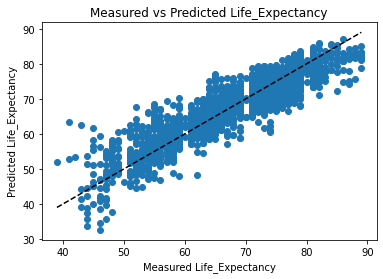

In [46]:
predictions = cross_val_predict(lr,X_train,Y_train,cv=kf)
fig, ax = plt.subplots()
ax.scatter(Y_train, predictions,)
ax.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], "k--")
ax.set_xlabel("Measured Life_Expectancy")
ax.set_ylabel("Predicted Life_Expectancy")
plt.title("Measured vs Predicted Life_Expectancy")
plt.show()

In [47]:
print(f"Mean Square Error : {mean_squared_error(Y_train, predictions)}")
print(f"r2 Score(Cross-Predicted Accuracy) : {r2_score(Y_train, predictions)}")

Mean Square Error : 15.715834191157855
r2 Score(Cross-Predicted Accuracy) : 0.8232781711508872


So if we let automated feature selection do the work it's giving 82% accuracy , let's try our hand engineered features & lets see if we can improve or not

In [48]:
# Y_pred=pd.DataFrame(predictions,columns=['Y_pred'])
# Y_pred=scaler.inverse_transform(Y_pred['Y_pred'])
# Y_pred

In [49]:
# plt.scatter(df_new['Life_Expectancy'],predictions)
# plt.xlabel('Life_Expectancy orginal')
# plt.ylabel('Life_Expectancy predicted')
# plt.title('Orginal vs Predicted')

In [50]:
# automated feature selection - using random forest
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
df_tmp=pd.DataFrame(X_train,columns=X.columns)
importances=pd.DataFrame({'feature':df_tmp.columns ,'importance':random_forest.feature_importances_})
importances.sort_values('importance',ascending=False).set_index('feature')
importances

,feature,importance
0,Adult_Mortality,0.120525
1,Infant_Deaths,0.044422
2,Alcohol,0.043478
3,Percentage_Expenditure,0.055275
4,Hepatitis_B,0.047473
5,Measles,0.047527
6,BMI,0.070715
7,Under-Five_Deaths,0.047938
8,Polio,0.049032
9,Total_Expenditure,0.041131


Now let's try with our engineered features , so dropping other features

In [51]:
#drop unnecessary column
df_handpicked=df
df_handpicked.drop(['Adult_Mortality','Infant_Deaths',
        'Percentage_Expenditure', 'Hepatitis_B',
       'Measles','Under-Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population','Thinness_1-19_Years',
       'Thinness_5-9_Years','Schooling'],axis=1,inplace=True)

In [52]:
# using IQR method to find outliers & replacing ihem with lower_range , upper_range 
#since our dataset is small
def outlier_imputation(data):
    for col in data.columns.values:
        sorted(data[col])
        q1,q3=np.percentile(data,[25,75])
        iqr=q3-q1
        lower_range=q1-(1.5*iqr)
        upper_range=q3+(1.5*iqr)
        data[data[col]<lower_range]=lower_range
        data[data[col]>upper_range]=upper_range
    return data

In [53]:
#apply outlier imputation
df_handpicked=outlier_imputation(df_handpicked[['Alcohol','BMI','ICR','Disease_Death','Mortality_Rate', 
                          'Vaccination_Immunity', 'Yearly_Cost_Schooling','Under_Weight', 
                          'Changed_Life_Expectancy']])

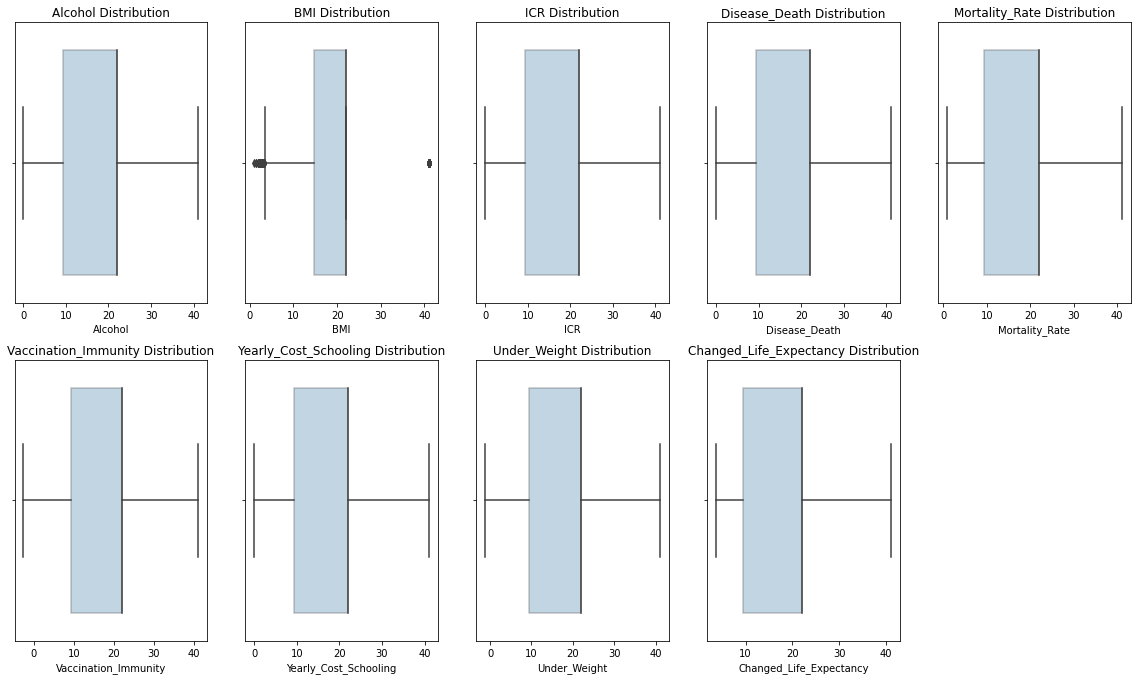

In [54]:
col=['Alcohol','BMI','ICR', 'Disease_Death','Mortality_Rate', 'Vaccination_Immunity', 
     'Yearly_Cost_Schooling','Under_Weight', 'Changed_Life_Expectancy']
dic={}
for i in range(len(col)):
    dic[col[i]]=i+1
# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for key,val in dic.items():
    plt.subplot(5,5,val)
    sns.boxplot(x=df_handpicked[key],data=df_handpicked,boxprops=dict(alpha=0.3))
    plt.xlabel(key)
    plt.title(key+' Distribution')

plt.show()

In [55]:
#converting both of them to integer as float can be large value for Linear Regression
X=df_handpicked.iloc[:,1:].astype('int')
Y=df_handpicked.iloc[:,0].astype('int')

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [57]:
scaler=RobustScaler()
#X_train_scaled=scaler.fit_transform(X_train) 
# let's do fit() & transform() separately for X_train
X_train_fit=scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
# transform X_test
X_test_scaled=scaler.transform(X_test) 
#use orginal variable for convenience
X_train=X_train_scaled
X_test=X_test_scaled

In [58]:
df_tmp=pd.DataFrame(X_train)
stats = df_tmp.describe()
stats.loc['median'] = df_tmp.median().tolist()
stats.loc['skew'] = df_tmp.skew().tolist()
stats.loc['kurt'] = df_tmp.kurtosis().tolist()
stats_df=pd.DataFrame(stats).reindex(['count','mean','std','median','50%','skew','kurt','min','max','25%','75%'])
stats_df 

,0,1,2,3,4,5,6,7
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,-0.442165,-0.530567,-0.514891,-0.490048,-0.488477,-0.511748,-0.502731,-0.460079
std,0.876724,0.800267,0.789439,0.742798,0.742539,0.773728,0.760958,0.701589
median,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skew,0.040043,-0.164228,-0.166670,-0.026117,-0.042167,-0.106858,-0.075859,0.090491
kurt,1.512532,-0.663065,-0.598121,-0.528393,-0.485133,-0.599861,-0.568840,-0.387441
min,-2.545455,-1.692308,-1.692308,-1.692308,-1.846154,-1.692308,-1.769231,-1.461538
max,2.303030,1.461538,1.461538,1.461538,1.461538,1.461538,1.461538,1.461538
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [59]:
lr = LinearRegression()
lr = lr.fit(X_train,Y_train)

r2 value is not a metric for model selection or model fit , so we avoid it here

In [60]:
#model evaluation for training set
Y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
print("The model performance for training set")
print(f"Train Error(rmse) : {rmse}")

The model performance for training set
Train Error(rmse) : 1.079098178738934


In [61]:
#model evaluation for test set
Y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_predict)))
print("The model performance for test set")
print(f"Train Error(rmse) : {rmse}")

The model performance for test set
Train Error(rmse) : 0.9277593889673849


high mean and low standard deviation of your quality measure would mean the modeling technique is doing well. 

In [62]:
folds=10
kf = KFold(shuffle=True,random_state=1,n_splits=folds)
cross_validation=cross_val_score(lr,X_train,Y_train, cv=kf,scoring='r2')
print(f"Cross-validated scores with splits = {folds} : {cross_validation}")
print(f"Mean value of {folds} cross validation score {np.mean(cross_validation)}")

Cross-validated scores with splits = 10 : [0.98639184 0.9810965  0.98622012 0.98753715 0.99053642 0.98699237
 0.99007786 0.9862456  0.99084107 0.98751146]
Mean value of 10 cross validation score 0.9873450387972882


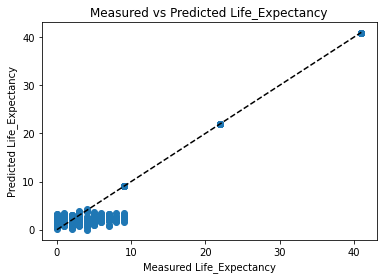

In [63]:
#predictions = cross_val_predict(lr,X,Y,cv=kf)
predictions = cross_val_predict(lr,X_train,Y_train,cv=kf)
fig, ax = plt.subplots()
ax.scatter(Y_train, predictions)
ax.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], "k--")
ax.set_xlabel("Measured Life_Expectancy")
ax.set_ylabel("Predicted Life_Expectancy")
plt.title("Measured vs Predicted Life_Expectancy")
plt.show()

In [64]:
print(f"Mean Square Error : {mean_squared_error(Y_train, predictions)}")
print(f"r2 Score(Cross-Predicted Accuracy) : {r2_score(Y_train, predictions)}")

Mean Square Error : 1.1960131003057517
r2 Score(Cross-Predicted Accuracy) : 0.9875049977122798


In [65]:
# using logistice regressor object to calculate correlation of features
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# calculate correlation coefficient
coeff_df = pd.DataFrame(df_handpicked.columns.delete(0)) # drop survived 
coeff_df.columns = ["Feature"]
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by="Correlation", ascending=False)
coeff_df

,Feature,Correlation
0,BMI,-0.156488
1,ICR,-1.243188
2,Disease_Death,-0.510905
3,Mortality_Rate,-2.709465
4,Vaccination_Immunity,-0.200335
5,Yearly_Cost_Schooling,-0.759685
6,Under_Weight,0.002835
7,Changed_Life_Expectancy,0.035595


# Who is the winner ?? 

So our hand engineered featurs are giving much more accuracy than just random forest feature importance method as we can see our hand engineered <br>

**Automated feature selection accuracy (r2 score) - 84%** <br>
**Automated feature selection MSE error  - 15** <br>
**Hand engineered feature selection accuracy (r2 score) - 98%** <br>
**Hand engineered feature selection MSE error  - 1** <br>

**Point of concern - As we have applied different kinds of Gaussian transformation the sprade of data points have shrinked,though it helped here to eliminate certain overlapping features but is it a true representation of population that is a big question** <br>


We can try using other type of regression with regularization to check if we can get an even better accuracy 
# And here the winner is - Hand Engineered Feature , But is it the true winner or there is something wrong about our approach